# Experiment 4

## Wine quality

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine

In [83]:
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from misc_utilities import regression_metrics, plot_hist_all_columns, plot_correlation_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df = pd.read_csv("winequalityN.csv")

## Analyse probleem
#### Wat is het probleem?
We gaan als target vector alcohol gebruiken, waar we gaan voorspellen wat het alcohol percentage van wijnen is.
#### Dimensies dataset?

In [84]:
print(f'Rows/Columns: {df.shape}')
print(df.isnull().sum())

Rows/Columns: (6497, 13)
type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64


#### Soorten data/features?

In [85]:
print(df.head(10))
print(df.describe())

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   
5  white            8.1              0.28         0.40             6.9   
6  white            6.2              0.32         0.16             7.0   
7  white            7.0              0.27         0.36            20.7   
8  white            6.3              0.30         0.34             1.6   
9  white            8.1              0.22         0.43             1.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0    

## Methoden
#### Welke preprocessing is nodig?
We gaan de rijen van null waarden droppen, sinds het er niet zoveel zijn. Na het bekijken van de correlatiematrix
(zie proces), gaan we alle acidity kolommen, en de sulphates kolom eruit halen, sinds er nauwelijks een correlatie
tussen blijkt te zitten. En we moeten ook de wijn types encoden sinds het nu een string is.
#### Welke modellen ga je vergelijken?
Ik ga linear regression en random forest regression vergelijken.
#### Welke performance metric is passend?
Ik ga R2 gebruiken, omdat het een makkelijk te begrijpen metric is.

## Voorspelling
#### Welke classifier zal het beste zijn en waarom?
Mijn verwachting is dat de random forest regressor het beter doet, omdat ik denk dat er te veel nuttige features
zijn om met linear regression een goede lijn te fitten.


## Process

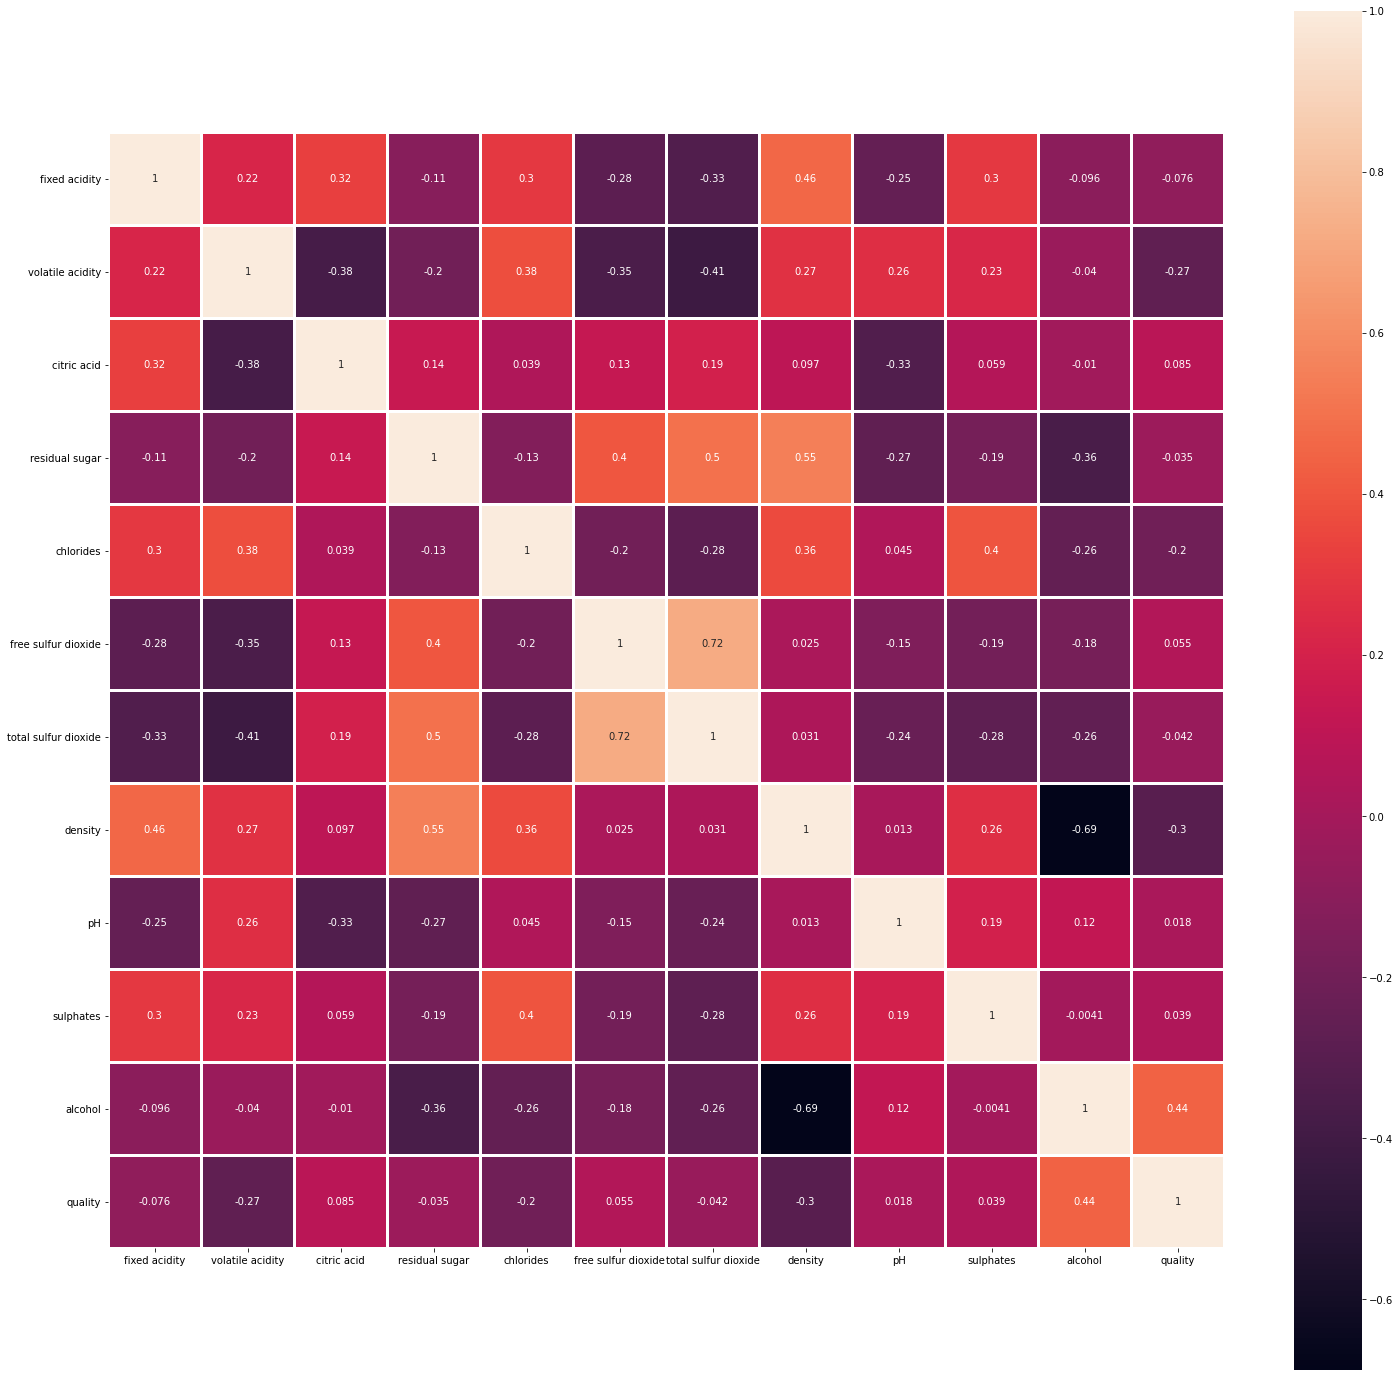

In [86]:
df.dropna(axis=0, inplace=True)
plot_correlation_matrix(df)
df.drop(['fixed acidity', 'volatile acidity', 'citric acid', 'sulphates'], axis=1, inplace=True)


In [87]:
enc = LabelEncoder()
df['type'] = enc.fit_transform(df['type'])
encoded_type = pd.get_dummies(df, columns=["type"], prefix=["wine_type"] )
df = df.merge(encoded_type, how='left')
df.drop(['type'], inplace=True, axis=1)

In [88]:
labels = df['alcohol']
df.drop(['alcohol'], inplace=True, axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, labels, random_state=5, train_size=0.7)

In [89]:
lreg = LinearRegression()
rf = RandomForestRegressor()

lreg.fit(X_train, y_train)
rf.fit(X_train, y_train)

lreg_pred = lreg.predict(X_test)
rf_pred = rf.predict(X_test)

## Resultaten

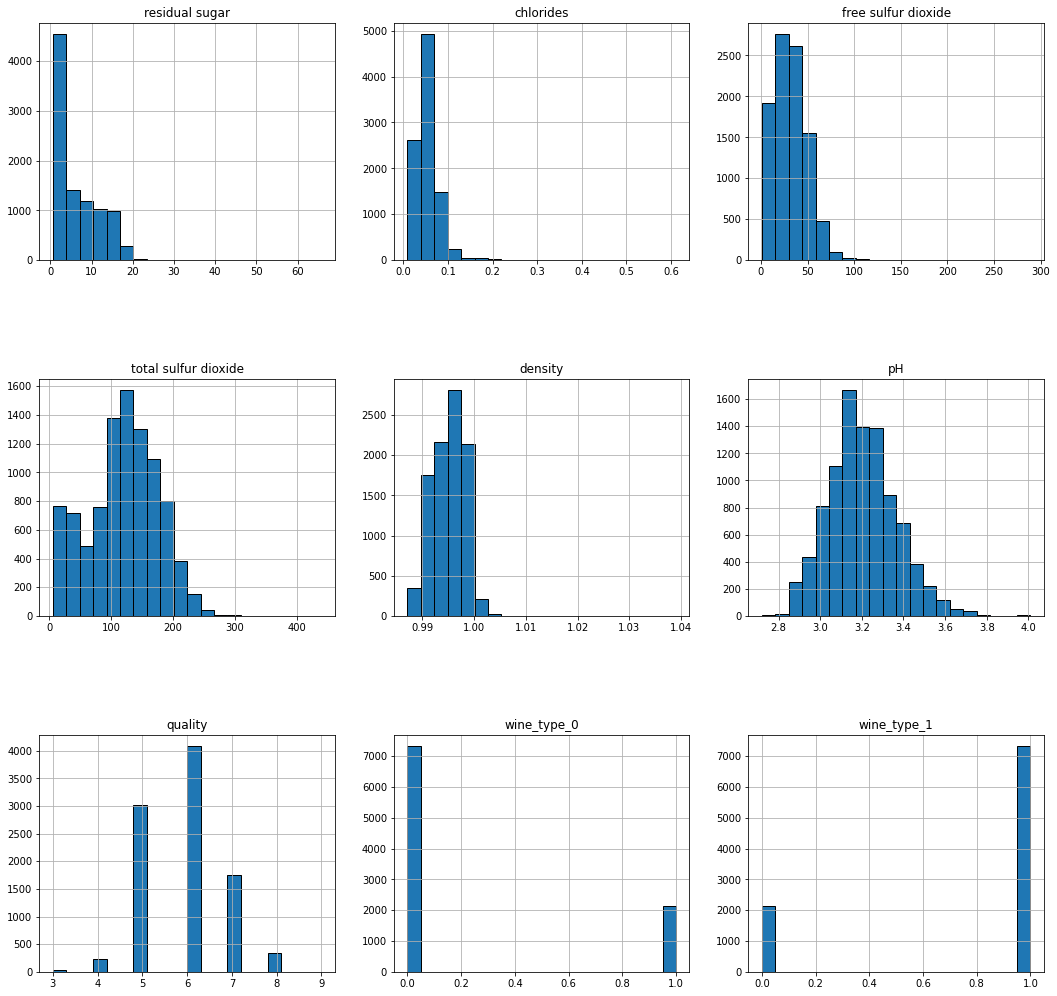

0.7085859875098057
0.8971360385955169


In [90]:
plot_hist_all_columns(df)

lreg_met = regression_metrics(y_test, lreg_pred)
rf_met = regression_metrics(y_test, rf_pred)

print(lreg_met['R2'])
print(rf_met['R2'])

## Conclusie
#### Welke classifier had het beste resultaat?
Random Forest Regressor had een beter resultaat.
#### Kwam dit overeen met de voorspelling? Waarom wel/niet?
Dit komt overeen met mijn voorspelling. Mijn vermoeden waarom dit is, is omdat desondanks de lage hoeveelheid kolommen,
linear regression waarschijnlijk niet een goede lijn kon trekken tussen de data.